In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_data.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_features.csv")

In [120]:
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('display.float_format',lambda x : '%.1f' % x)

In [121]:
df

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,nan,-3504386.0,nan,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,nan,1617011.0,174839.0,True,2748364.0,nan,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,nan,nan,nan,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,nan,1920000.0,22122.0,True,6843672.0,nan,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,nan,-4167.0,nan,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,nan,nan,1573324.0,True,869220.0,nan,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,nan,nan,nan,michael.kopper@enron.com,nan,118134.0,nan,nan,nan,nan,602671.0,907502.0,True,985032.0,nan,224305.0,nan,nan,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,nan,-262500.0,nan,christopher.calger@enron.com,nan,35818.0,144.0,199.0,25.0,nan,375304.0,486.0,True,126027.0,nan,240189.0,2188.0,2598.0,1639297.0,126027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,nan,nan,nan,frank.stabler@enron.com,nan,16514.0,nan,nan,nan,nan,nan,356071.0,False,511734.0,nan,239502.0,nan,nan,1112087.0,511734.0
109,BROWN MICHAEL,nan,nan,nan,nan,michael.brown@enron.com,nan,49288.0,41.0,13.0,1.0,nan,nan,nan,False,nan,nan,nan,761.0,1486.0,49288.0,nan
110,PICKERING MARK R,300000.0,nan,nan,nan,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,0.0,400000.0,nan,nan,False,nan,nan,655037.0,728.0,898.0,1386690.0,28798.0
111,HAUG DAVID L,nan,nan,nan,nan,david.haug@enron.com,nan,475.0,19.0,4.0,7.0,nan,nan,nan,False,2217299.0,nan,nan,471.0,573.0,475.0,2217299.0


In [122]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,98.2
restricted_stock_deferred,91.2
director_fees,88.5
deferral_payments,75.2
deferred_income,69.9
long_term_incentive,56.6
bonus,46.0
from_messages,42.5
from_poi_to_this_person,42.5
from_this_person_to_poi,42.5


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [124]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,61.0,28.0,34.0,13.0,81.0,73.0,65.0,65.0,65.0,2.0,49.0,69.0,82.0,10.0,73.0,65.0,65.0,96.0,98.0
mean,1147436.4,634437.4,-462566.4,89397.8,2985080.8,51040.5,711.3,64.8,40.1,40962500.0,792617.1,447177.4,1294854.8,-221885.7,273902.5,1111.4,2156.1,2590977.3,3527135.8
std,1505189.0,860364.6,809539.2,41143.4,6004173.6,47596.7,2074.5,91.9,88.9,57364037.6,950464.5,1341563.8,2498335.3,205191.4,171664.7,1165.9,2811.7,10566445.8,7182997.2
min,70000.0,-102500.0,-3504386.0,3285.0,3285.0,148.0,12.0,0.0,0.0,400000.0,71023.0,2.0,44093.0,-560222.0,477.0,2.0,57.0,148.0,-44093.0
25%,450000.0,76567.5,-552703.2,101250.0,400478.0,18834.0,19.0,10.0,0.0,20681250.0,275000.0,972.0,268922.0,-389621.8,206121.0,178.0,517.0,302402.5,421151.8
50%,750000.0,195190.0,-117534.0,108579.0,850010.0,41953.0,45.0,28.0,7.0,40962500.0,422158.0,52382.0,462822.5,-139856.5,251654.0,599.0,1088.0,1106740.0,997971.0
75%,1000000.0,834205.2,-27083.2,112492.0,2165172.0,59175.0,215.0,88.0,27.0,61243750.0,831809.0,362096.0,966490.5,-77953.2,288589.0,1902.0,2649.0,1985668.2,2493616.0
max,8000000.0,2964506.0,-1042.0,125034.0,34348384.0,228763.0,14368.0,528.0,411.0,81525000.0,5145434.0,10359729.0,14761694.0,44093.0,1111258.0,4527.0,15149.0,103559793.0,49110078.0


In [125]:
cor = df.corr()[['poi','salary']]
cor

,poi,salary
bonus,0.2,0.6
deferral_payments,-0.3,-0.1
deferred_income,-0.2,-0.2
director_fees,nan,nan
exercised_stock_options,0.6,0.6
expenses,0.1,0.1
from_messages,-0.1,0.0
from_poi_to_this_person,0.1,0.1
from_this_person_to_poi,-0.1,0.0
loan_advances,1.0,1.0


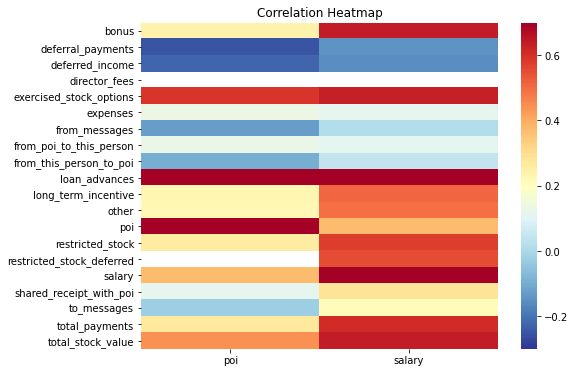

In [126]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(cor, cmap = plt.cm.RdYlBu_r, vmin = -0.3, vmax = 0.7)  #annot選擇是否每格顯示數字
plt.title('Correlation Heatmap');

In [127]:
table = df.groupby(['poi']).describe()
table

bonus                      ... total_stock_value                      
      count      mean       std  ...               50%        75%        max
poi                              ...                                        
False  50.0  977872.4 1264121.4  ...          955873.0  2217299.0 23817930.0
True   11.0 1918181.8 2228483.0  ...         1920055.0 22542539.0 49110078.0

[2 rows x 152 columns]

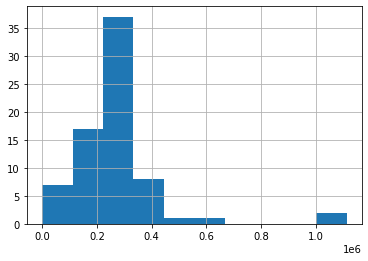

In [128]:
df['salary'].hist()

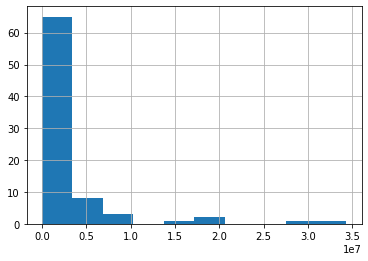

In [129]:
df['exercised_stock_options'].hist()

# 切割訓練/驗證資料 及 X,Y

In [130]:
train_Y = df['poi']
train_X = df.drop(['poi','name'],axis=1)

test_X = df_test.drop(['name'],axis=1)

# 資料 - 前置處裡 (Missing)

In [131]:
# 處理前
ck_null = train_X.isnull().sum().reset_index(name='emp')
ck_null

,index,emp
0,bonus,52
1,deferral_payments,85
2,deferred_income,79
3,director_fees,100
4,email_address,30
5,exercised_stock_options,32
6,expenses,40
7,from_messages,48
8,from_poi_to_this_person,48
9,from_this_person_to_poi,48


In [132]:
#空值數比較多的 → 選擇補0 。應該是真的無數字
for col in ck_null[ck_null['emp'] > 48]['index']:
    train_X[col] = train_X[col].fillna(0)

In [133]:
#空值數=48 → 選擇補中位數 。都是mail相關的
for col in ck_null[ck_null['emp'] == 48]['index']:
    train_X[col] = train_X[col].fillna(df[col].median())

In [134]:
#空值數<48 → 也選擇補中位數 。應該要有值
for col in ck_null[ck_null['emp'] < 48]['index']:
    if col not in ['name','email_address']:
        train_X[col] = train_X[col].fillna(df[col].median())

In [135]:
# email欄位，皆為
train_X['email_address'] = train_X['email_address'].map(lambda x: 1 if pd.notnull(x) else 0)

In [136]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      113 non-null    float64
 1   deferral_payments          113 non-null    float64
 2   deferred_income            113 non-null    float64
 3   director_fees              113 non-null    float64
 4   email_address              113 non-null    int64  
 5   exercised_stock_options    113 non-null    float64
 6   expenses                   113 non-null    float64
 7   from_messages              113 non-null    float64
 8   from_poi_to_this_person    113 non-null    float64
 9   from_this_person_to_poi    113 non-null    float64
 10  loan_advances              113 non-null    float64
 11  long_term_incentive        113 non-null    float64
 12  other                      113 non-null    float64
 13  restricted_stock           113 non-null    float64

# 特徵縮放

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

#僅用train data來訓練縮放器
std = StandardScaler()
X_std = std.fit_transform(train_X)
mms = MinMaxScaler()
X_mms = mms.fit_transform(train_X)
norm = Normalizer()
X_norm = norm.fit_transform(train_X)

# 查看特徵縮放效果

In [138]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings("ignore")

stand = {"train_x":train_X,"X_std":X_std,"X_mms":X_mms,"X_norm":X_norm}

for i,x in stand.items():
    
    print('----------------',i,'------------------')

    # NAIBE BAYES
    from sklearn.naive_bayes import GaussianNB
    
    model = GaussianNB()
    print('Naive Bayes',cross_val_score(model,x,train_Y.values.ravel(), cv=10).mean())

    #KNN
    from sklearn.neighbors import KNeighborsClassifier

    knn_model = KNeighborsClassifier()
    print('KNN',cross_val_score(knn_model,x,train_Y.values.ravel(), cv=10).mean())

    #RANDOM FOREST
    from sklearn.ensemble import RandomForestClassifier

    rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
    print('Random Forest',cross_val_score(rfc_model,x,train_Y.values.ravel(), cv=10).mean())

    #LOGISTIC REGRESSION
    from sklearn.linear_model import LogisticRegression

    lr_model = LogisticRegression(solver = 'saga')
    print('Logistic Regression',cross_val_score(lr_model,x,train_Y.values.ravel(), cv=10).mean())

    #SVM
    from sklearn.svm import SVC

    svc_model = SVC(gamma = 'auto')
    print('SVM',cross_val_score(svc_model,x,train_Y.values.ravel(), cv=10).mean())

    #DECISON TREE
    from sklearn.tree import DecisionTreeClassifier

    dtree_model = DecisionTreeClassifier()
    print('Decision Tree',cross_val_score(dtree_model,x,train_Y.values.ravel(), cv=10).mean())

    #GradientBOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier()
    print("GradientBoosting", cross_val_score(clf,x,train_Y.values.ravel(), cv=10).mean())


    #ADABOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier(loss='exponential')
    print("ADABOOST", cross_val_score(clf,x,train_Y.values.ravel(), cv=10).mean())

    #XGBOOST

    import xgboost as xgb
    # 建立模型
    print("XGBOOST", cross_val_score(xgb.sklearn.XGBClassifier(),x,train_Y.values.ravel(), cv=10).mean())

    import lightgbm as lgb
    print("lightgbm", cross_val_score(lgb.LGBMClassifier(),x,train_Y.values.ravel(), cv=10).mean())

---------------- train_x ------------------
Naive Bayes 0.8037878787878787
KNN 0.8946969696969695
Random Forest 0.8946969696969695
Logistic Regression 0.8863636363636364
SVM 0.8863636363636364
Decision Tree 0.8674242424242424
GradientBoosting 0.8946969696969695
ADABOOST 0.8946969696969695
XGBOOST 0.8598484848484848
lightgbm 0.8507575757575758
---------------- X_std ------------------
Naive Bayes 0.5477272727272726
KNN 0.8689393939393939
Random Forest 0.8946969696969695
Logistic Regression 0.8939393939393939
SVM 0.8863636363636364
Decision Tree 0.8583333333333332
GradientBoosting 0.8946969696969695
ADABOOST 0.8946969696969695
XGBOOST 0.8598484848484848
lightgbm 0.859848484848485
---------------- X_mms ------------------
Naive Bayes 0.5386363636363635
KNN 0.8954545454545453
Random Forest 0.8946969696969695
Logistic Regression 0.8954545454545453
SVM 0.8863636363636364
Decision Tree 0.8409090909090908
GradientBoosting 0.8946969696969695
ADABOOST 0.8946969696969695
XGBOOST 0.859848484848484

In [139]:
#最佳化參數 - 使用GridSearch[挑幾個效果好的ML]   使用未標準化 train_x 原始的

x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2,random_state=123)

#Random Forest Classifier
rfc = RandomForestClassifier(random_state=99)

#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(x_train, y_train.values.ravel())
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Parmas',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,x_train, y_train.values.ravel(), cv=10).mean())
print('Random Forest Test Accuracy',metrics.accuracy_score(y_test,rfc_best.predict(x_test)))

#KNN 
knn = KNeighborsClassifier()

#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(x_train,y_train.values.ravel())
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,x_train, y_train.values.ravel(), cv=10).mean())
print('KNN Test Accuracy',metrics.accuracy_score(y_test,knn_best.predict(x_test)))

#SVM
# svc = SVC()

# #USING GRID SEARCH
# parameters = [{'kernel':['linear'],'C':[1,10,100]},
#               {'kernel':['rbf'],'C':[1,50],'gamma':[0.01,0.001]}]
# grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(x_train, y_train.values.ravel())
# svm_best = grid_search_svm.best_estimator_
# print('SVM Best Score',grid_search_svm.best_score_)
# print('SVM Best Params',grid_search_svm.best_params_)
# print('SVM Accuracy',cross_val_score(svm_best,x_train, y_train.values.ravel(), cv=10).mean())
# print('SVM Test Accuracy',metrics.accuracy_score(y_test,svm_best.predict(x_test)))

#GradientBoost

# 建立模型
clf = GradientBoostingClassifier()

n_estimators = [50, 100, 200, 300, 400]
max_depth = [1, 2, 3, 4, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(x_train, y_train.values.ravel())
clf_best = grid_search_clf.best_estimator_
print('GBT Best Score',grid_search_clf.best_score_)
print('GBT Best Params',grid_search_clf.best_params_)
print('GBT Accuracy',cross_val_score(clf_best,x_train, y_train.values.ravel(), cv=10).mean())
print('GBT Test Accuracy',metrics.accuracy_score(y_test,clf_best.predict(x_test)))


#XGBoost

# 建立模型
xgbt = xgb.sklearn.XGBClassifier(objective='binary:logistic',seed=13)

learning_rate = [0.01, 0.05, 0.1, 0.3]
n_estimators = [50, 100, 200, 300, 400]
max_depth = [3, 5, 6, 10]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

grid_search_xgbt = GridSearchCV(estimator=xgbt, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(x_train, y_train.values.ravel())
xgbt_best = grid_search_clf.best_estimator_
print('XGBT Best Score',grid_search_xgbt.best_score_)
print('XGBT Best Params',grid_search_xgbt.best_params_)
print('XGBT Accuracy',cross_val_score(xgbt_best,x_train, y_train.values.ravel(), cv=10).mean())
print('XGBT Test Accuracy',metrics.accuracy_score(y_test,xgbt_best.predict(x_test)))

Random Forest Best Score 0.9
Random Forest Best Parmas {'max_depth': 3, 'n_estimators': 50}
Random Forest Accuracy 0.9
Random Forest Test Accuracy 0.8695652173913043
KNN Best Score 0.9
KNN Best Params {'n_neighbors': 5}
KNN Accuracy 0.9
KNN Test Accuracy 0.8260869565217391
GBT Best Score 0.8777777777777777
GBT Best Params {'max_depth': 1, 'n_estimators': 50}
GBT Accuracy 0.8777777777777777
GBT Test Accuracy 0.9130434782608695
XGBT Best Score 0.8777777777777777
XGBT Best Params {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
XGBT Accuracy 0.8777777777777777
XGBT Test Accuracy 0.9130434782608695


# 要繳交之Test 資料實作

In [140]:
# 處理 test 資料  (依照訓練資料的資訊做補值)

#空值數比較多的 → 選擇補0 。應該是真的無數字
for col in ck_null[ck_null['emp'] > 48]['index']:
    test_X[col] = test_X[col].fillna(0)

#空值數=48 → 選擇補中位數 。都是mail相關的
for col in ck_null[ck_null['emp'] == 48]['index']:
    test_X[col] = test_X[col].fillna(df[col].median())

#空值數<48 → 也選擇補中位數 。應該要有值
for col in ck_null[ck_null['emp'] < 48]['index']:
    if col not in ['name','email_address']:
        test_X[col] = test_X[col].fillna(df[col].median())

# email欄位，皆為
test_X['email_address'] = test_X['email_address'].map(lambda x: 1 if pd.notnull(x) else 0)

In [141]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      33 non-null     float64
 1   deferral_payments          33 non-null     float64
 2   deferred_income            33 non-null     float64
 3   director_fees              33 non-null     float64
 4   email_address              33 non-null     int64  
 5   exercised_stock_options    33 non-null     float64
 6   expenses                   33 non-null     float64
 7   from_messages              33 non-null     float64
 8   from_poi_to_this_person    33 non-null     float64
 9   from_this_person_to_poi    33 non-null     float64
 10  loan_advances              33 non-null     float64
 11  long_term_incentive        33 non-null     float64
 12  other                      33 non-null     float64
 13  restricted_stock           33 non-null     float64
 

In [151]:
#GBT
clf_pred = clf_best.predict_proba(test_X)[:,1]
clf_result = pd.DataFrame({'name': df_test['name'], 'poi': clf_pred})
clf_result.to_csv('Enron_gbt.csv', index=False)

#Random Forest
rfc_pred = rfc_best.predict_proba(test_X)[:,1]
rfc_result = pd.DataFrame({'name': df_test['name'], 'poi': rfc_pred})
rfc_result.to_csv('Enron_rfc.csv', index=False)

#XGBoost
xgbt_pred = xgbt_best.predict_proba(test_X)[:,1]
xgbt_result = pd.DataFrame({'name': df_test['name'], 'poi': xgbt_pred})
xgbt_result.to_csv('Enron_xgbt.csv', index=False)

#KNN
knn_pred = knn_best.predict_proba(test_X)[:,1]
knn_result = pd.DataFrame({'name': df_test['name'], 'poi': knn_pred})
knn_result.to_csv('Enron_knn.csv', index=False)

#blending
blending_pred = clf_pred*0.4  + rfc_pred*0.2 + xgbt_pred*0.4 
blending_result = pd.DataFrame({'name': df_test['name'], 'poi': blending_pred})
blending_result.to_csv('Enron_blending.csv', index=False)

In [153]:
test_X

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,5249999.0,2144013.0,-2334434.0,0.0,1,953136.0,17355.0,484.0,228.0,108.0,0.0,0.0,210698.0,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,1350000.0,0.0,-833.0,0.0,1,850010.0,65907.0,27.0,140.0,15.0,0.0,974293.0,1621.0,252055.0,0.0,278601.0,1593.0,1858.0,2669589.0,252055.0
2,1500000.0,0.0,-3117011.0,0.0,1,5538001.0,34039.0,32.0,32.0,21.0,0.0,1617011.0,11350.0,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0
3,3000000.0,0.0,0.0,0.0,1,2291113.0,86174.0,3069.0,66.0,609.0,0.0,1294981.0,1661.0,1323148.0,0.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,1000000.0,0.0,-235000.0,0.0,1,850010.0,30674.0,49.0,58.0,12.0,0.0,350000.0,307895.0,2502063.0,0.0,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,1700000.0,0.0,0.0,0.0,1,850010.0,98849.0,27.0,40.0,1.0,0.0,69223.0,1936.0,441096.0,0.0,211788.0,900.0,1320.0,2081796.0,441096.0
6,2000000.0,6426990.0,-3367011.0,0.0,1,10433518.0,86987.0,21.0,242.0,6.0,2000000.0,1617011.0,7427621.0,4188667.0,0.0,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,0.0,0.0,-98784.0,98784.0,0,850010.0,41953.0,45.0,28.0,7.0,0.0,0.0,52382.0,32460.0,-32460.0,251654.0,599.0,1088.0,1106740.0,997971.0
8,800000.0,0.0,-300000.0,0.0,1,765920.0,96268.0,22.0,188.0,11.0,0.0,0.0,891.0,315068.0,0.0,278601.0,772.0,865.0,875760.0,1080988.0
9,100000.0,51365.0,-200000.0,0.0,0,4160672.0,8409.0,45.0,28.0,7.0,0.0,156250.0,202052.0,201483.0,-140264.0,76399.0,599.0,1088.0,394475.0,4221891.0


# 以下為看資料

In [ ]:
df[df['salary'].isnull()]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
17,WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130.0
23,MCDONALD REBECCA,NaN,NaN,NaN,NaN,rebecca.mcdonald@enron.com,757301.0,NaN,13.0,54.0,1.0,NaN,NaN,NaN,False,934065.0,NaN,NaN,720.0,894.0,NaN,1691366.0
24,CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850.0,NaN,12.0,10.0,0.0,NaN,NaN,NaN,False,386335.0,NaN,NaN,58.0,764.0,NaN,1038185.0
25,GATHMANN WILLIAM D,NaN,NaN,NaN,NaN,NaN,1753766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,264013.0,-72419.0,NaN,NaN,NaN,NaN,1945360.0
27,POWERS WILLIAM,NaN,NaN,-17500.0,17500.0,ken.powers@enron.com,NaN,NaN,26.0,0.0,0.0,NaN,NaN,NaN,False,NaN,NaN,NaN,12.0,653.0,NaN,NaN
30,WHALEY DAVID A,NaN,NaN,NaN,NaN,NaN,98718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,98718.0
35,URQUHART JOHN A,NaN,NaN,-36666.0,36666.0,NaN,NaN,228656.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,228656.0,NaN
38,PEREIRA PAULO V. FERRAZ,NaN,NaN,-101250.0,101250.0,NaN,NaN,27942.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,27942.0,NaN
39,HAYSLETT RODERICK J,NaN,NaN,NaN,NaN,rod.hayslett@enron.com,NaN,NaN,1061.0,35.0,38.0,NaN,NaN,NaN,False,346663.0,NaN,NaN,571.0,2649.0,NaN,346663.0


In [ ]:
df['email_address'].map(lambda x: str(x)[0:str(x).find('@')]).value_counts().reset_index().sort_values(by='email_address',ascending=False)

,index,email_address
0,na,30
53,gene.humphrey,1
61,lou.pai,1
60,john.lavorato,1
59,s..muller,1
...,...,...
26,john.buchanan,1
25,ben.glisan,1
24,brian.redmond,1
23,tracy.foy,1


In [ ]:
df[df['exercised_stock_options'].isnull()]['poi'].value_counts()

False    28
True      4
Name: poi, dtype: int64

In [ ]:
df[df['exercised_stock_options'].notnull()]['poi'].value_counts()

False    72
True      9
Name: poi, dtype: int64